<span style="color: red; font-size: 50px; font-weight: bold">      ZOMATO DATA ANALYSIS   </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('Zomato.csv')

In [6]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [7]:
df.shape

(51717, 11)

In [ ]:
df.drop(['url','address','phone','menu_item','reviews_list','dish_liked'],axis=1,inplace=True)   

In [9]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51609 non-null  object
 1   online_order                 51609 non-null  object
 2   book_table                   51609 non-null  object
 3   rate                         43854 non-null  object
 4   votes                        51609 non-null  int64 
 5   location                     51588 non-null  object
 6   rest_type                    51382 non-null  object
 7   cuisines                     51564 non-null  object
 8   approx_cost(for two people)  51265 non-null  object
 9   listed_in(type)              51609 non-null  object
 10  listed_in(city)              51609 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


<span style="color: yellow; font-size: 15px; font-weight: bold">Cleaning rate column</span>

In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

<span style="color: yellow; font-size: 15px; font-weight: bold">Remove "/5" , 'New' and '-' from rate column</span>

In [13]:
def handlerate(value):
    if value== 'NEW' or value== '-':
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

df['rate']=df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [14]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

<span style="color: yellow; font-size: 15px; font-weight: bold">Flling null values in rate column with mean</span>

In [15]:
df['rate'] = df['rate'].fillna(df['rate'].mean())
df['rate'].isnull().sum()

np.int64(0)

<span style="color: yellow; font-size: 15px; font-weight: bold">Drop null values</span>

In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51042 non-null  object 
 1   online_order                 51042 non-null  object 
 2   book_table                   51042 non-null  object 
 3   rate                         51042 non-null  float64
 4   votes                        51042 non-null  int64  
 5   location                     51042 non-null  object 
 6   rest_type                    51042 non-null  object 
 7   cuisines                     51042 non-null  object 
 8   approx_cost(for two people)  51042 non-null  object 
 9   listed_in(type)              51042 non-null  object 
 10  listed_in(city)              51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


<span style="color: yellow; font-size: 15px; font-weight: bold">Rename columns</span>

In [18]:
df.rename(columns={'approx_cost(for two people)':'Cost2plates','listed_in(type)': 'Type'},inplace=True)

In [19]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plates', 'Type', 'listed_in(city)'],
      dtype='object')

<span style="color: yellow; font-size: 15px; font-weight: bold">Check unique values in 'location' and 'listed_in(city) columns</span>

In [20]:
df['location'].nunique()

93

In [21]:
df['listed_in(city)'].nunique()

30

In [22]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [23]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

<span style="color: yellow; font-size: 15px; font-weight: bold">Drop listed_in(city) column</span>

In [24]:
df.drop(['listed_in(city)'],axis=1,inplace=True)

In [25]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plates', 'Type'],
      dtype='object')

<span style="color: yellow; font-size: 15px; font-weight: bold">Cleaning Cost2plates column</span>

In [26]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [27]:
df['Cost2plates'].nunique()

70

<span style="color: yellow; font-size: 15px; font-weight: bold">Removing ',' from Cost2plates column</span>

In [28]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float (value)
    else:
        return float (value)

df['Cost2plates']=df['Cost2plates'].apply(handlecomma)
    

In [29]:
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

<span style="color: yellow; font-size: 15px; font-weight: bold">Cleaning rest_type column</span>

In [30]:
rest_types=df['rest_type'].value_counts(ascending=False)

In [31]:
rest_types

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

<span style="color: yellow; font-size: 15px; font-weight: bold">Check values in rest_type less than 1000</span>

In [32]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Dessert Parlor, Food Court      2
Food Court, Beverage Shop       2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: count, Length: 85, dtype: int64

<span style="color: yellow; font-size: 15px; font-weight: bold">Making rest_types less than 1000 in value as other</span>

In [33]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value

df['rest_type']=df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

<span style="color: yellow; font-size: 15px; font-weight: bold">Cleaning location column</span>

In [34]:
df['location'].value_counts()

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [35]:
location = df['location'].value_counts(ascending=False)
location_lessthan300 = location[location < 300]




def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value

df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

<span style="color: yellow; font-size: 15px; font-weight: bold">Cleaning cuisines column</span>

In [36]:
df['cuisines'].value_counts()

cuisines
North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Mughlai, Rolls          1
Cafe, Healthy Food, Fast Food, Beverages       1
Fast Food, Hot dogs                            1
Biryani, Kebab, Kerala                         1
South Indian, Cafe                             1
Name: count, Length: 2704, dtype: int64

In [37]:
cuisines = df['cuisines'].value_counts(ascending=False)
cuisines_lessthan100 = cuisines[cuisines < 100]




def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value

df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

<span style="color: yellow; font-size: 30px; font-weight: bold">Visualization</span>

<span style="color: yellow; font-size: 18px; font-weight: bold">count plot for various locations</span>

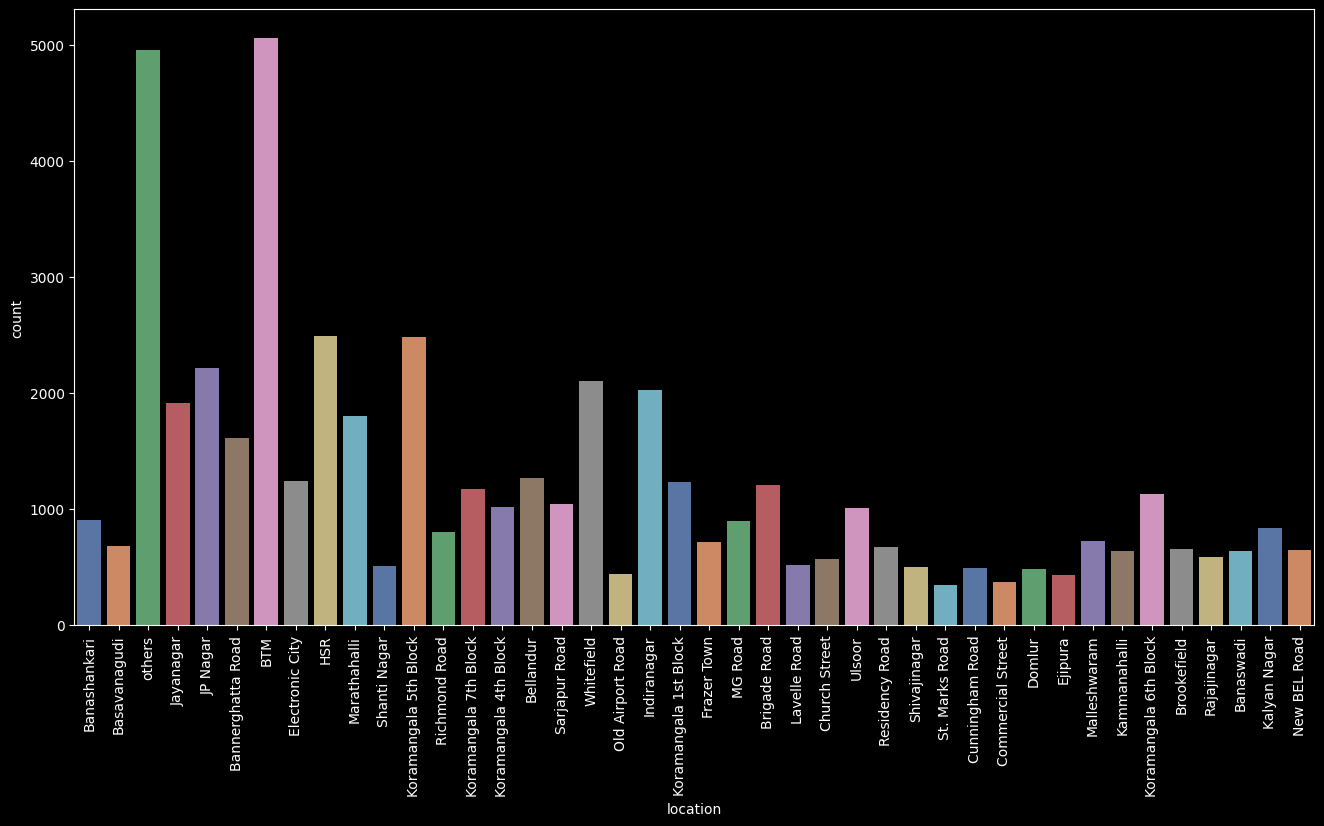

In [38]:
plt.figure(figsize = (16,8))
ax = sns.countplot(x='location',data=df,palette='deep',hue='location')
plt.xticks(rotation=90)
plt.show()

<span style="color: yellow; font-size: 18px; font-weight: bold">count plot for online_orders</span>


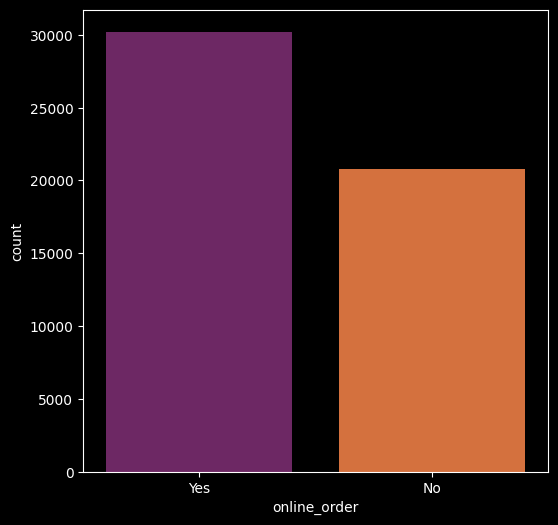

In [40]:
plt.figure(figsize = (6,6))
sns.countplot(x='online_order',data=df,palette='inferno',hue='online_order')
plt.show()

<span style="color: yellow; font-size: 18px; font-weight: bold">count plot for  book table</span>

<Axes: xlabel='book_table', ylabel='count'>

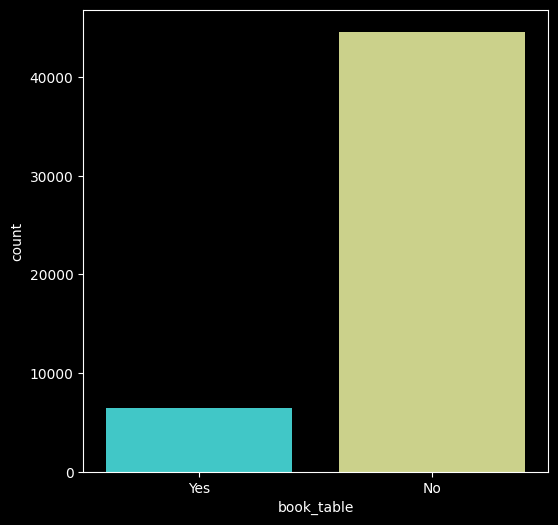

In [41]:
plt.figure(figsize = (6,6))
sns.countplot(x='book_table',data=df,palette='rainbow',hue='book_table')

<span style="color: yellow; font-size: 18px; font-weight: bold">Visualizing online_orders vs rate</span>

<Axes: xlabel='online_order', ylabel='rate'>

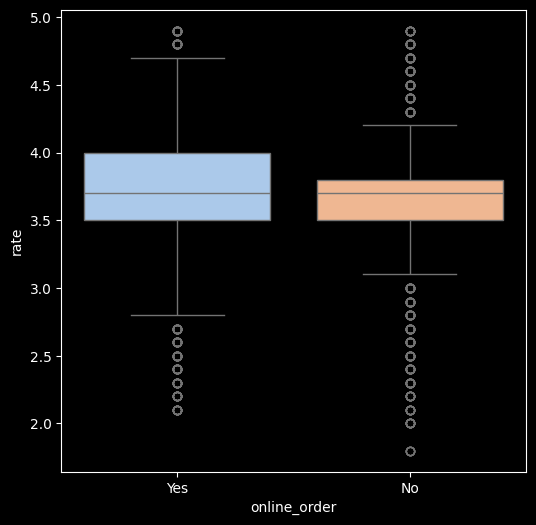

In [42]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order',y='rate',data=df,palette='pastel',hue='online_order')

<span style="color: yellow; font-size: 18px; font-weight: bold">Visualizing book table vs rate</span>

<Axes: xlabel='book_table', ylabel='rate'>

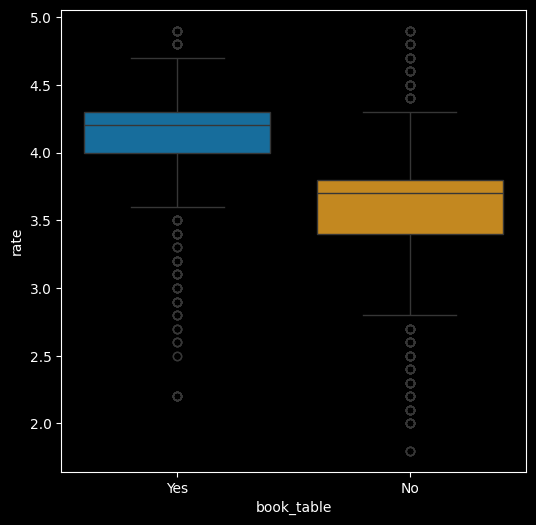

In [43]:
plt.figure(figsize = (6,6))
sns.boxplot(x='book_table',y='rate',data=df,palette='colorblind',hue='book_table')

<span style="color: yellow; font-size: 18px; font-weight: bold">Visualizing onine order facility,location wise</span>

In [54]:
# first group data 
df1 = df.groupby(['location','online_order'])['name'].count()
# create csv file of df1 data
df1.to_csv('location_online.csv')
# read csv
df1 = pd.read_csv('location_online.csv')
#create pivot table
df1 = pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'] ,fill_value=0,aggfunc='sum')
df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

<Axes: xlabel='location'>

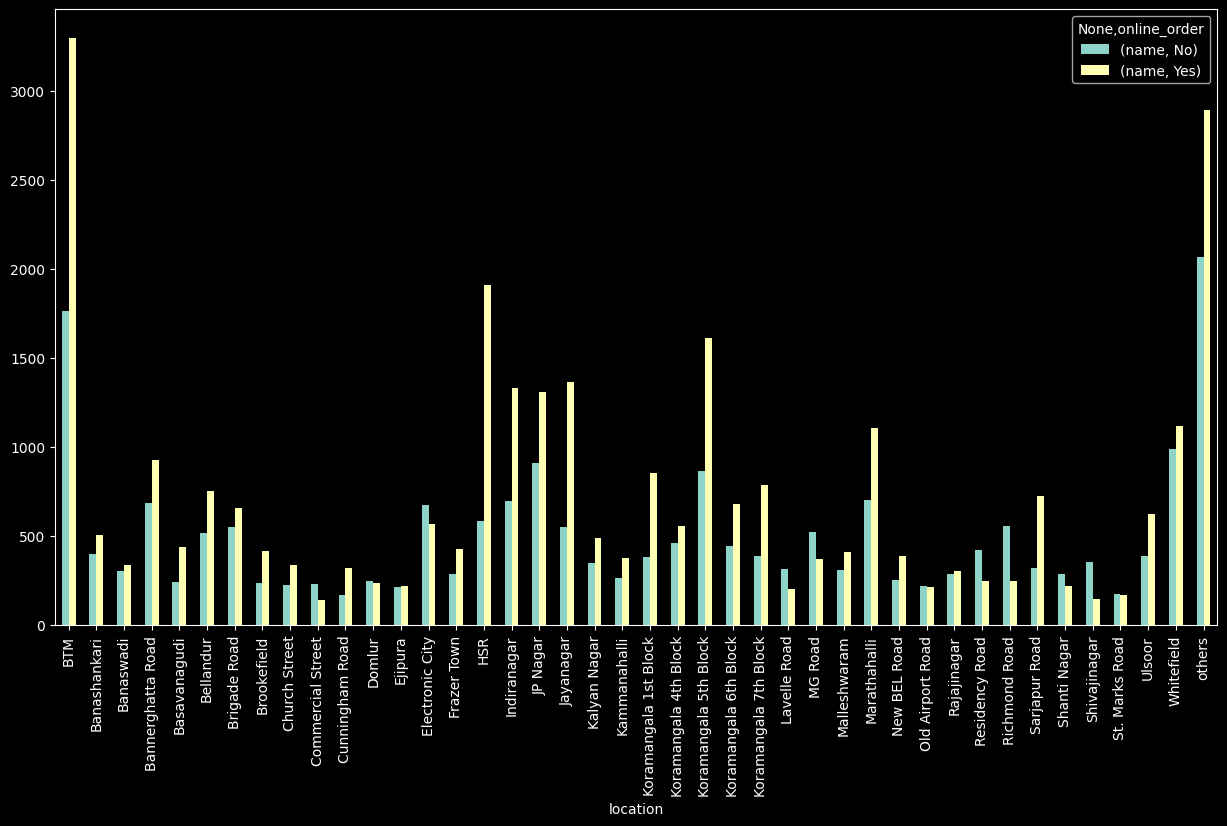

In [51]:
df1.plot(kind='bar',figsize=(15,8))

<span style="color: yellow; font-size: 18px; font-weight: bold">Visualizing Book Table Facility,Location wise</span>

In [56]:
# first group data 
df2 = df.groupby(['location','book_table'])['name'].count()
# create csv file of df1 data
df2.to_csv('location_booktable.csv')
# read csv
df2 = pd.read_csv('location_booktable.csv')
#create pivot table
df2 = pd.pivot_table(df2,values=None,index=['location'],columns=['book_table'] ,fill_value=0,aggfunc='sum')
df2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

<Axes: xlabel='location'>

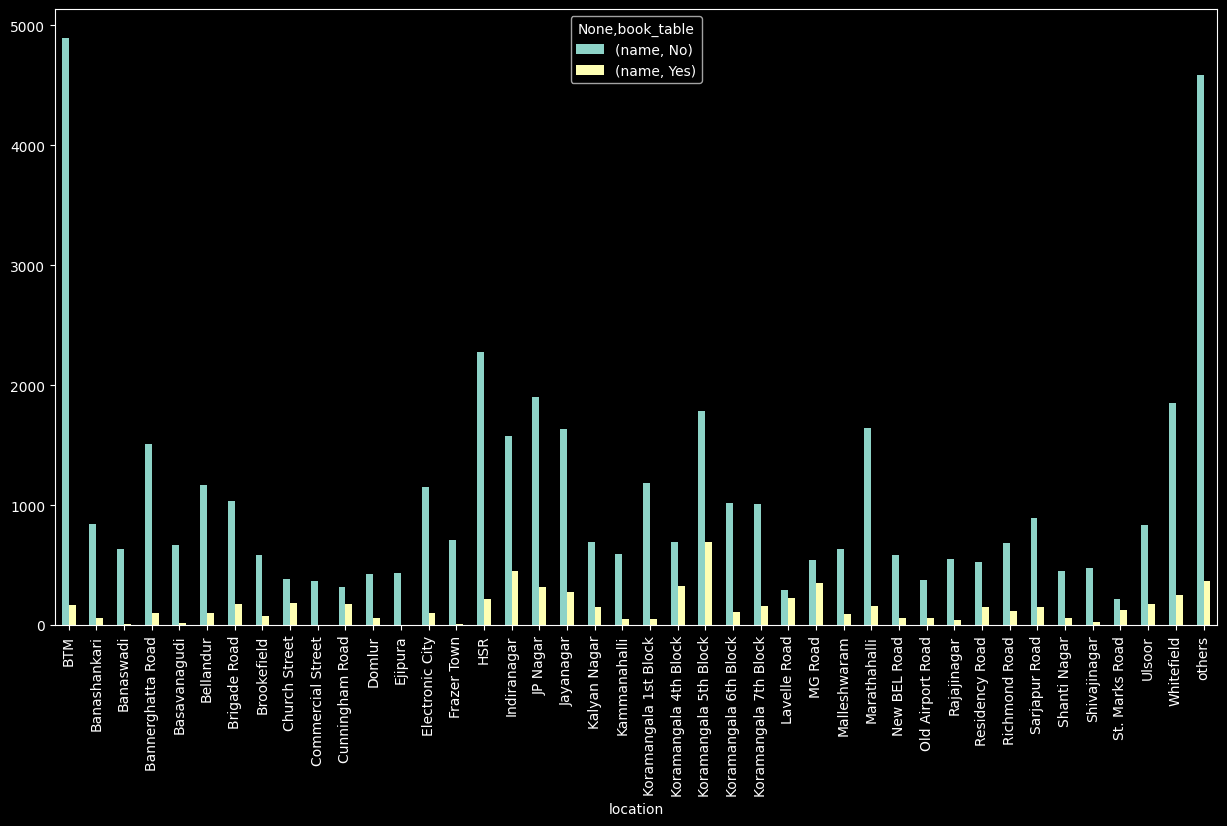

In [57]:
df2.plot(kind='bar',figsize=(15,8))

<span style="color: yellow; font-size: 18px; font-weight: bold">Visualizing Types of Restaurent vs Rate</span>


<Axes: xlabel='Type', ylabel='rate'>

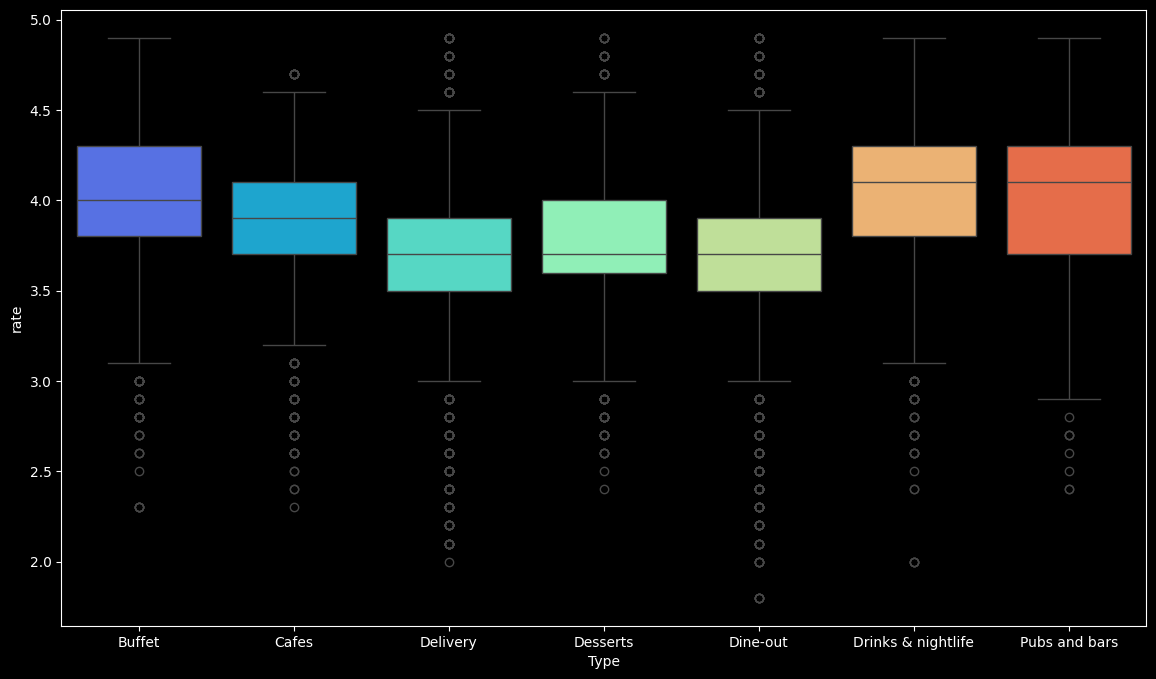

In [64]:
plt.figure(figsize = (14,8))
sns.boxplot(x='Type',y='rate',data=df,palette='rainbow',hue='Type')

<span style="color: yellow; font-size: 18px; font-weight: bold">Grouping Types of Restaurents,Location Wise</span>

In [69]:
df3 = df.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3,values=None,index=['location'],columns=['Type'],fill_value=0,aggfunc='sum')
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1553   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<Axes: xlabel='location'>

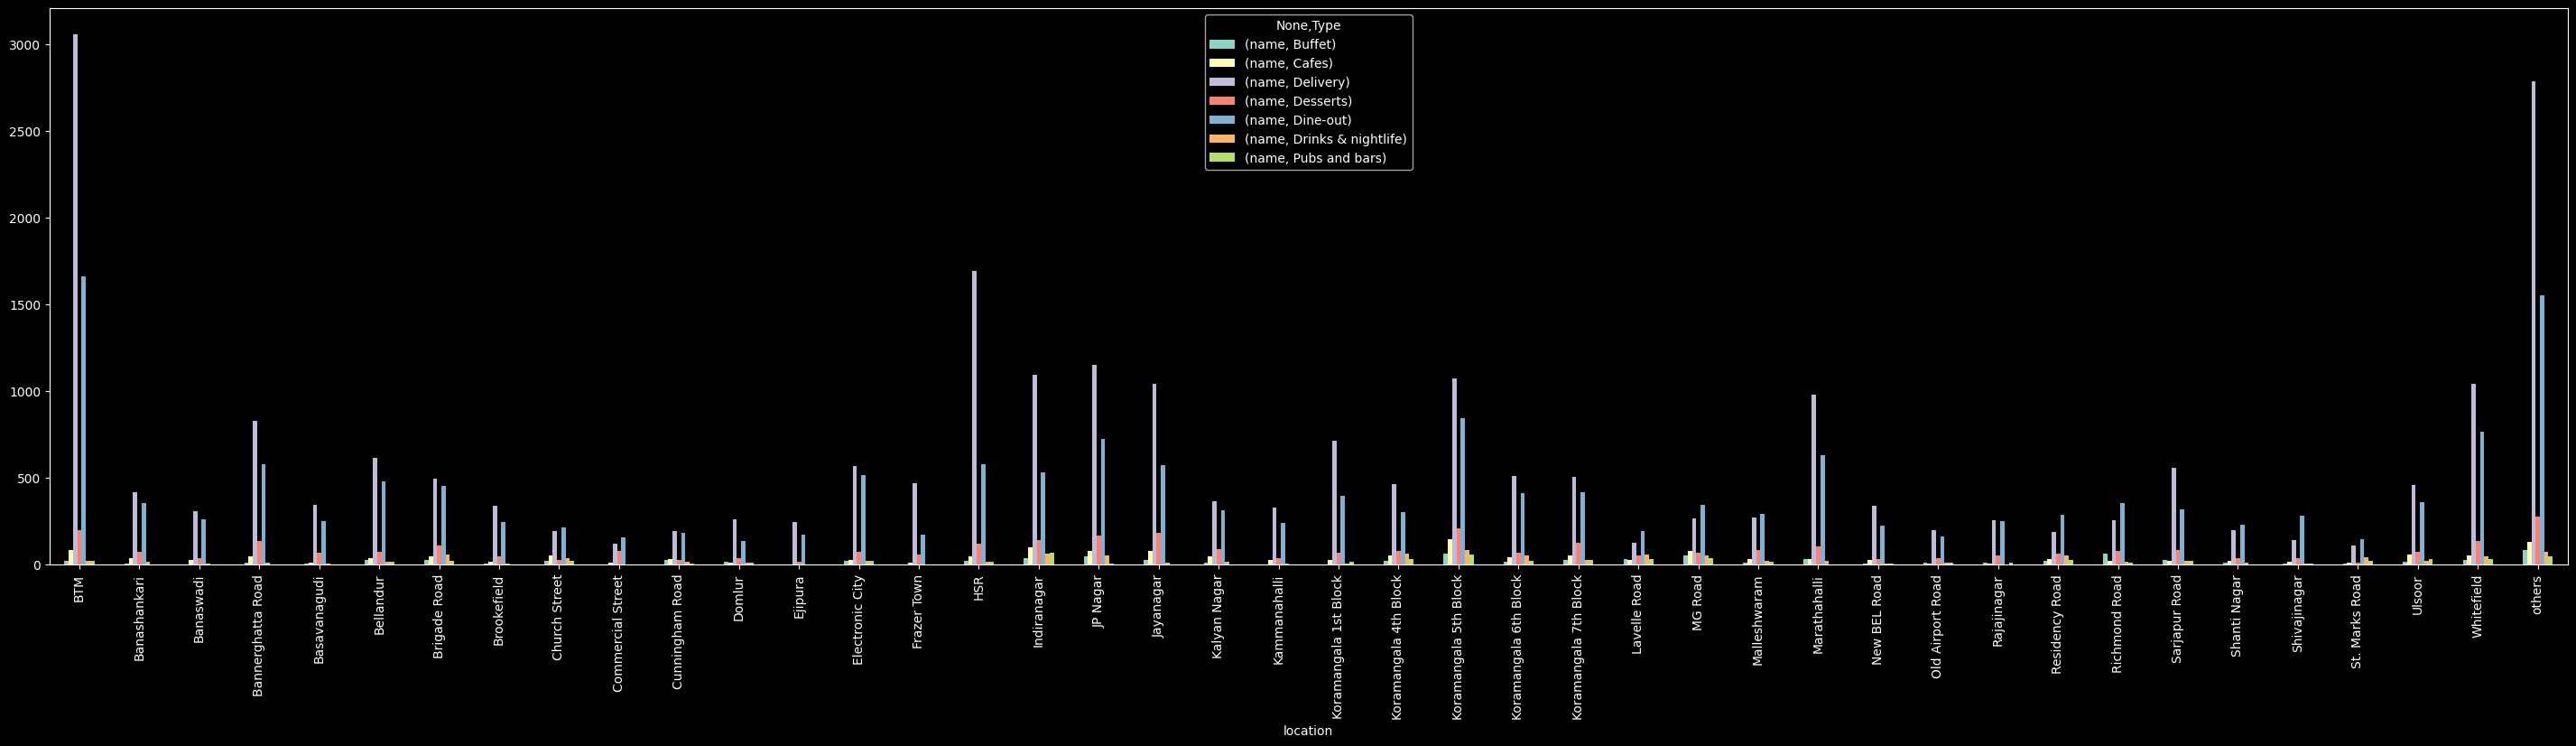

In [70]:
df3.plot(kind='bar',figsize=(36,8))

<span style="color: yellow; font-size: 18px; font-weight: bold">No. of Votes,Location Wise</span>

In [75]:
df4 = df[['location','votes']]
df4.drop_duplicates()
df5=df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 =df5.sort_values('votes',ascending=False)
df5.head()
                     

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


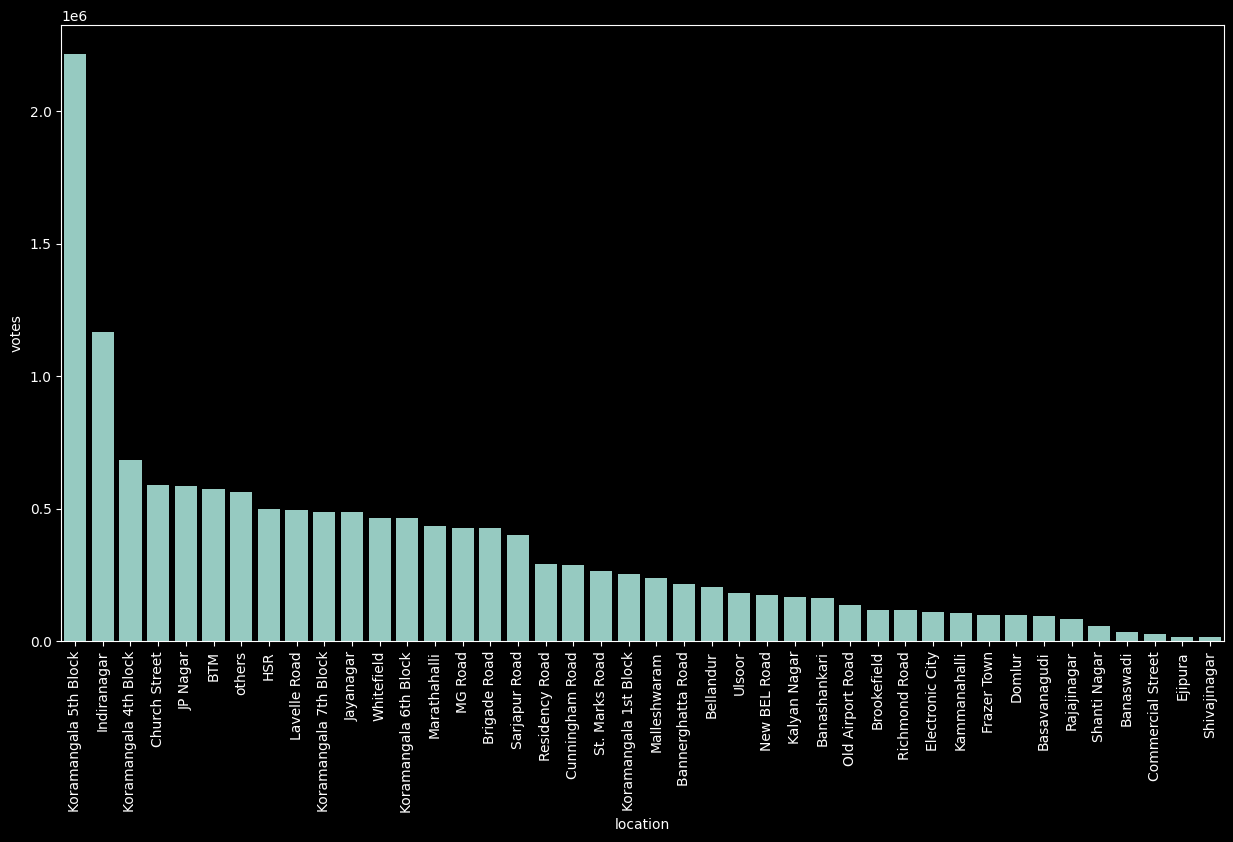

In [90]:
plt.figure(figsize=(15,8))
sns.barplot(x=df5.index,y=df5['votes'])
plt.xticks(rotation=90)
plt.show()

<span style="color: yellow; font-size: 18px; font-weight: bold">Visualizing top Cuisines</span>

In [91]:
df6 = df[['cuisines','votes']]
df6.drop_duplicates()
df7=df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 =df7.sort_values('votes',ascending=False)
df7.head()
       

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [92]:
df7 = df7.iloc[1:,:]
df7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


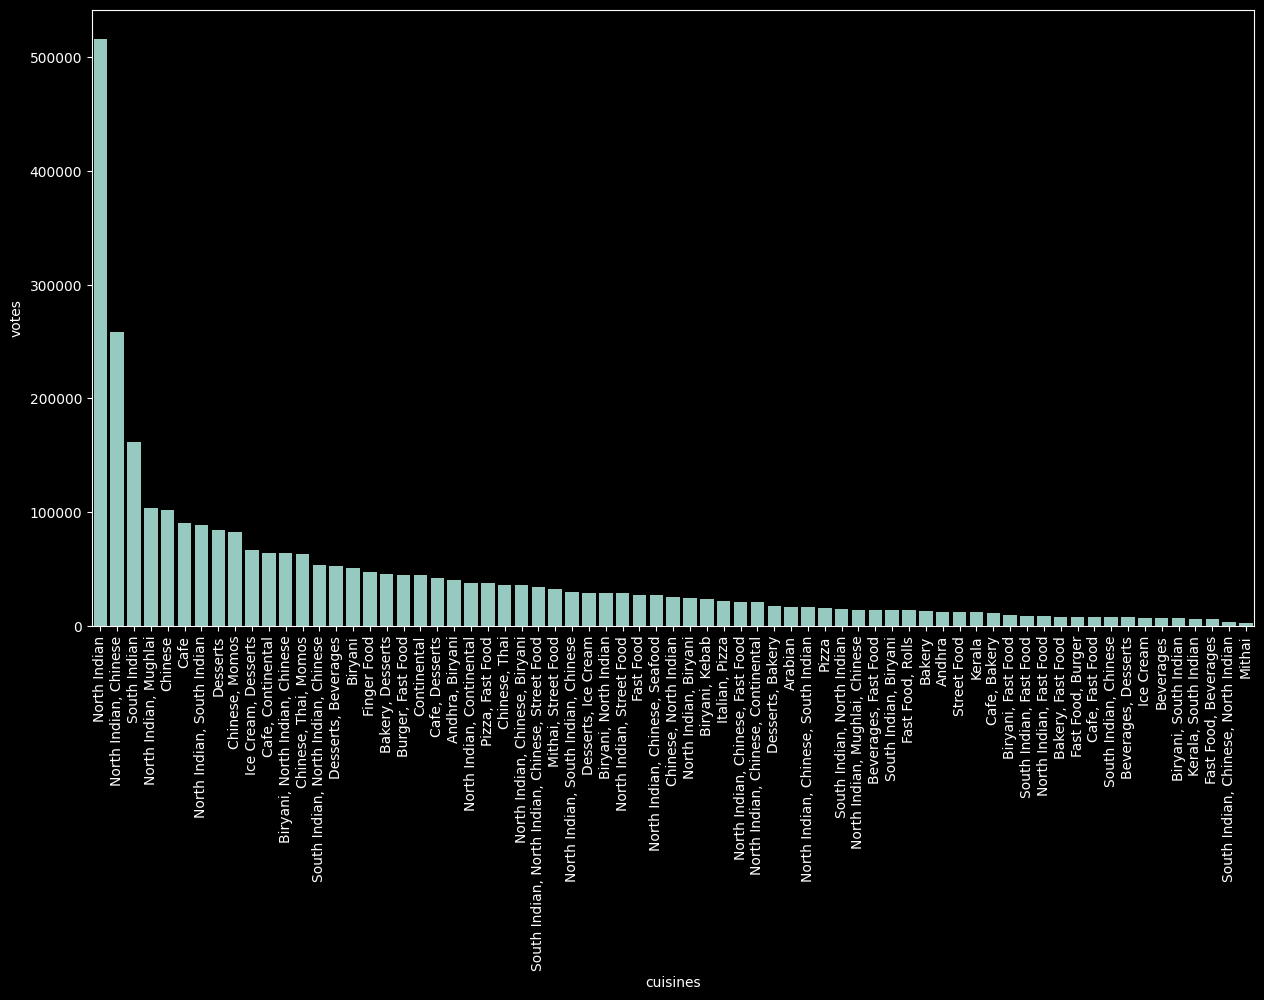

In [95]:
plt.figure(figsize=(15,8))
sns.barplot(x=df7.index,y=df7['votes'])
plt.xticks(rotation=90)
plt.show()